![](https://www.assetinfinity.com/blog/wp-content/uploads/2019/09/Inventory-management-system-objectives.png)

# Import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import math 
import random 
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the data into the notebook

In [2]:
data = pd.read_csv('../input/al-bundy-stats/Al-Bundy_raw-data.csv')

# Lets Look at the Data

In [3]:
data.head()  # checking a few rows of the dataframe

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice
0,52389,1/1/2014,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,2014,1,159.0
1,52390,1/1/2014,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,2014,1,159.2
2,52391,1/1/2014,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,2014,1,119.2
3,52392,1/1/2014,United States,2234,US6,Female,9.5,40,7.5,159,0.0,2014,1,159.0
4,52393,1/1/2014,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,2014,1,159.0


# Year-Wise Sales of Shoeniverse 

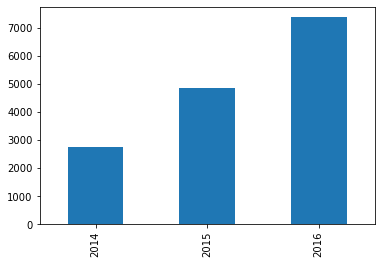

In [4]:
# Since Sales has increased every year it is a wise decision to invest in this company.
data['Year'].value_counts(ascending=True).plot.bar()   

# Basic EDA

In [5]:
#The data has 14967 instances with 14 attributes,5 integer type, 4 float type and 5 object type.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InvoiceNo      14967 non-null  int64  
 1   Date           14967 non-null  object 
 2   Country        14967 non-null  object 
 3   ProductID      14967 non-null  int64  
 4   Shop           14967 non-null  object 
 5   Gender         14967 non-null  object 
 6   Size (US)      14967 non-null  float64
 7   Size (Europe)  14967 non-null  object 
 8   Size (UK)      14967 non-null  float64
 9   UnitPrice      14967 non-null  int64  
 10  Discount       14967 non-null  float64
 11  Year           14967 non-null  int64  
 12  Month          14967 non-null  int64  
 13  SalePrice      14967 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.6+ MB
None


## Checking For Null Values

In [6]:
print(data.isna().sum()) #null value check
# There is no null value in any column

InvoiceNo        0
Date             0
Country          0
ProductID        0
Shop             0
Gender           0
Size (US)        0
Size (Europe)    0
Size (UK)        0
UnitPrice        0
Discount         0
Year             0
Month            0
SalePrice        0
dtype: int64


## Dropping Columns

In [7]:
data.drop('Size (Europe)',axis=1,inplace=True)
data.drop('Size (UK)',axis=1,inplace=True)

In [8]:
data.head()

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),UnitPrice,Discount,Year,Month,SalePrice
0,52389,1/1/2014,United Kingdom,2152,UK2,Male,11.0,159,0.0,2014,1,159.0
1,52390,1/1/2014,United States,2230,US15,Male,11.5,199,0.2,2014,1,159.2
2,52391,1/1/2014,Canada,2160,CAN7,Male,9.5,149,0.2,2014,1,119.2
3,52392,1/1/2014,United States,2234,US6,Female,9.5,159,0.0,2014,1,159.0
4,52393,1/1/2014,United Kingdom,2222,UK4,Female,9.0,159,0.0,2014,1,159.0


### the column are dropped

## Segregation  into Numerical and Categorical Variables


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   InvoiceNo  14967 non-null  int64  
 1   Date       14967 non-null  object 
 2   Country    14967 non-null  object 
 3   ProductID  14967 non-null  int64  
 4   Shop       14967 non-null  object 
 5   Gender     14967 non-null  object 
 6   Size (US)  14967 non-null  float64
 7   UnitPrice  14967 non-null  int64  
 8   Discount   14967 non-null  float64
 9   Year       14967 non-null  int64  
 10  Month      14967 non-null  int64  
 11  SalePrice  14967 non-null  float64
dtypes: float64(3), int64(5), object(4)
memory usage: 1.4+ MB


In [10]:
data['InvoiceNo'] = data['InvoiceNo'].astype('object')
data['ProductID'] = data['ProductID'].astype('object')
data['Year'] = data['Year'].astype('object')
data['Month'] = data['Month'].astype('object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   InvoiceNo  14967 non-null  object 
 1   Date       14967 non-null  object 
 2   Country    14967 non-null  object 
 3   ProductID  14967 non-null  object 
 4   Shop       14967 non-null  object 
 5   Gender     14967 non-null  object 
 6   Size (US)  14967 non-null  float64
 7   UnitPrice  14967 non-null  int64  
 8   Discount   14967 non-null  float64
 9   Year       14967 non-null  object 
 10  Month      14967 non-null  object 
 11  SalePrice  14967 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1.4+ MB


## Analysing Categorical Variables

In [12]:
print(data.Gender.value_counts(),'\n')
print(data.Country.value_counts(),'\n')
print(data.Year.value_counts())

Male      8919
Female    6048
Name: Gender, dtype: int64 

United States     5886
Germany           4392
Canada            2952
United Kingdom    1737
Name: Country, dtype: int64 

2016    7366
2015    4848
2014    2753
Name: Year, dtype: int64


## Extracting Country Wise data

In [13]:
us = data[data.Country == 'United States']
ger = data[data.Country == 'Germany']
can = data[data.Country == 'Canada']
uk = data[data.Country == 'United Kingdom']

# Measures of Central Tendancy based on Shoe Size

## Range of Shoe Sizes for Males and Females

In [14]:
min_m = data[data['Gender'] == 'Male']['Size (US)'].min()
max_m = data[data['Gender'] == 'Male']['Size (US)'].max()
min_f = data[data['Gender'] == 'Female']['Size (US)'].min()
max_f = data[data['Gender'] == 'Female']['Size (US)'].max()
print("Range of Shoe Sizes for Males: ",min_m," - ", max_m)
print("Range of Shoe Sizes for Females: ",min_f," - ", max_f)

Range of Shoe Sizes for Males:  6.0  -  15.0
Range of Shoe Sizes for Females:  4.5  -  12.0


# Male Shoe Size

In [15]:
male_size = data[data['Gender'] == 'Male']['Size (US)']
female_size = data[data['Gender'] == 'Female']['Size (US)']

In [16]:
mean_us = np.mean(male_size)
print('Mean:',mean_us)

# 9.5 is the median value but is finding median value the most accurate way to stock up lets find out ?
median_us = (np.median(male_size))
print('Median:',median_us)

# 9.5 - The shoe size with max demand.
mode_us = (male_size.mode())
print('Mode:',mode_us)

Mean: 9.785065590312815
Median: 9.5
Mode: 0    9.5
dtype: float64


# Female Shoe Size

In [17]:
mean_us = np.mean(female_size)
print('Mean:',mean_us)

# 8.5 is the median value but is finding median value the most accurate way to stock up lets find out ?
median_us = (np.median(female_size))
print('Median:',median_us)

# 8.0 - The shoe size with max demand.
mode_us = (female_size.mode())
print('Mode:',mode_us)

Mean: 8.32638888888889
Median: 8.5
Mode: 0    8.0
dtype: float64


## Distribution of Sold Units based on Shoe Size

### For Males

In [18]:
# compute the quartiles
mq1 = data[data['Gender'] == 'Male']['Size (US)'].quantile(q=0.25)   # compute the first quartile
mq2 = data[data['Gender'] == 'Male']['Size (US)'].quantile(q=0.50)   # compute the second quartile
mq3 = data[data['Gender'] == 'Male']['Size (US)'].quantile(q=0.75)   # compute the third quartile
#plt.title("", fontsize = 20)
#plt.xlabel("", fontsize = 15)
locs,labels = [mq1,mq2,mq3],[mq1,mq2,mq3]           # get locations and labels

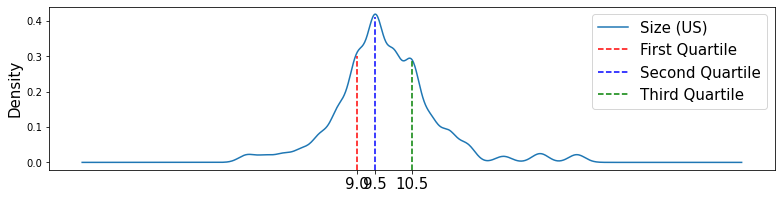

More than 50 percent of the sales are of shoe sizes between 9 and 10.5


In [19]:
plt.rcParams["figure.figsize"] = [13,3]
data[data['Gender'] == 'Male']['Size (US)'].plot(kind='density') # plot the density plot the density plot
plt.axvline(x = mq1, ymax=0.70, color='red', linestyle='--', label ="First Quartile")     # plot the first quartile
plt.axvline(x = mq2, ymax=0.94, color='blue', linestyle='--', label ="Second Quartile")   # plot the second quartile
plt.axvline(x = mq3, ymax=0.68, color='green', linestyle='--', label ="Third Quartile")   # plot the third quartile
plt.legend(loc="best", fontsize= 15)
plt.ylabel("Density", fontsize = 15)
plt.xticks(locs, labels, fontsize = 15 )# set locations and labels
plt.show()# to display the figure
print('More than 50 percent of the sales are of shoe sizes between 9 and 10.5')

### For Females

In [20]:
# compute the quartiles
fq1 = data[data['Gender'] == 'Female']['Size (US)'].quantile(q=0.25)   # compute the first quartile
fq2 = data[data['Gender'] == 'Female']['Size (US)'].quantile(q=0.50)   # compute the second quartile
fq3 = data[data['Gender'] == 'Female']['Size (US)'].quantile(q=0.75)   # compute the third quartile
#plt.title("", fontsize = 20)
#plt.xlabel("", fontsize = 15)
locs,labels = [fq1,fq2,fq3],[fq1,fq2,fq3]           # get locations and labels

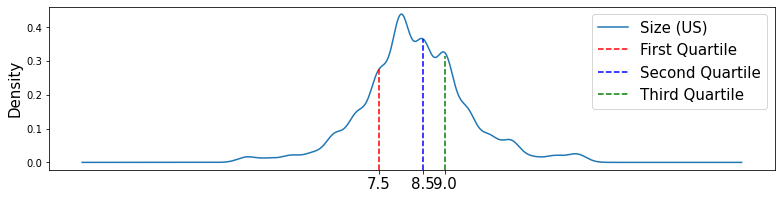

More than 50 percent of the sales are of shoe sizes between 7.5 and 9


In [21]:
plt.rcParams["figure.figsize"] = [13,3]
data[data['Gender'] == 'Female']['Size (US)'].plot(kind='density') # plot the density plot the density plot
plt.axvline(x = fq1, ymax=0.62, color='red', linestyle='--', label ="First Quartile")     # plot the first quartile
plt.axvline(x = fq2, ymax=0.80, color='blue', linestyle='--', label ="Second Quartile")   # plot the second quartile
plt.axvline(x = fq3, ymax=0.70, color='green', linestyle='--', label ="Third Quartile")   # plot the third quartile
plt.legend(loc="best", fontsize= 15)
plt.ylabel("Density", fontsize = 15)
plt.xticks(locs, labels, fontsize = 15 )# set locations and labels
plt.show()# to display the figure
print('More than 50 percent of the sales are of shoe sizes between 7.5 and 9')

## EDA for Germany

## Range of Shoe Sizes for Males and Females in Germany

In [22]:
min_m = ger[ger['Gender'] == 'Male']['Size (US)'].min()
max_m = ger[ger['Gender'] == 'Male']['Size (US)'].max()
min_f = ger[ger['Gender'] == 'Female']['Size (US)'].min()
max_f = ger[ger['Gender'] == 'Female']['Size (US)'].max()
print("Range of Shoe Sizes for Males: ",min_m," - ", max_m)
print("Range of Shoe Sizes for Females: ",min_f," - ", max_f)

Range of Shoe Sizes for Males:  6.0  -  15.0
Range of Shoe Sizes for Females:  4.5  -  12.0


# Male Shoe Size in Germany

In [23]:
male_size = ger[ger['Gender'] == 'Male']['Size (US)']
female_size = ger[ger['Gender'] == 'Female']['Size (US)']

In [24]:
mean_us = np.mean(male_size)
print('Mean:',mean_us)

# 9.5 is the median value but is finding median value the most accurate way to stock up lets find out ?
median_us = (np.median(male_size))
print('Median:',median_us)

# 9.5 - The shoe size with max demand.
mode_us = (male_size.mode())
print('Mode:',mode_us)

Mean: 9.879524886877828
Median: 10.0
Mode: 0    9.5
dtype: float64


# Female Shoe Size in Germany

In [25]:
mean_us = np.mean(female_size)
print('Mean:',mean_us)

# 8.5 is the median value but is finding median value the most accurate way to stock up lets find out ?
median_us = (np.median(female_size))
print('Median:',median_us)

# 8.0 - The shoe size with max demand.
mode_us = (female_size.mode())
print('Mode:',mode_us)

Mean: 8.318103448275862
Median: 8.5
Mode: 0    8.5
dtype: float64


## Distribution of Sold Units based on Shoe Size in Germany

### For Males in Germany

In [26]:
# compute the quartiles
mq1 = ger[ger['Gender'] == 'Male']['Size (US)'].quantile(q=0.25)   # compute the first quartile
mq2 = ger[ger['Gender'] == 'Male']['Size (US)'].quantile(q=0.50)   # compute the second quartile
mq3 = ger[ger['Gender'] == 'Male']['Size (US)'].quantile(q=0.75)   # compute the third quartile
#plt.title("", fontsize = 20)
#plt.xlabel("", fontsize = 15)
locs,labels = [mq1,mq2,mq3],[mq1,mq2,mq3]           # get locations and labels

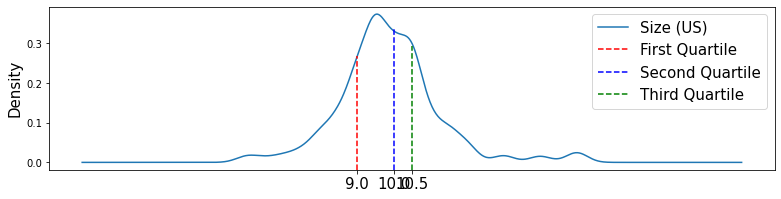

More than 50 percent of the sales are of shoe sizes between 9 and 10.5


In [27]:
plt.rcParams["figure.figsize"] = [13,3]
ger[ger['Gender'] == 'Male']['Size (US)'].plot(kind='density') # plot the density plot the density plot
plt.axvline(x = mq1, ymax=0.70, color='red', linestyle='--', label ="First Quartile")     # plot the first quartile
plt.axvline(x = mq2, ymax=0.87, color='blue', linestyle='--', label ="Second Quartile")   # plot the second quartile
plt.axvline(x = mq3, ymax=0.76, color='green', linestyle='--', label ="Third Quartile")   # plot the third quartile
plt.legend(loc="best", fontsize= 15)
plt.ylabel("Density", fontsize = 15)
plt.xticks(locs, labels, fontsize = 15 )# set locations and labels
plt.show()# to display the figure
print('More than 50 percent of the sales are of shoe sizes between 9 and 10.5')

### For Females in Germany

In [28]:
# compute the quartiles
fq1 = ger[ger['Gender'] == 'Female']['Size (US)'].quantile(q=0.25)   # compute the first quartile
fq2 = ger[ger['Gender'] == 'Female']['Size (US)'].quantile(q=0.50)   # compute the second quartile
fq3 = ger[ger['Gender'] == 'Female']['Size (US)'].quantile(q=0.75)   # compute the third quartile
#plt.title("", fontsize = 20)
#plt.xlabel("", fontsize = 15)
locs,labels = [fq1,fq2,fq3],[fq1,fq2,fq3]           # get locations and labels

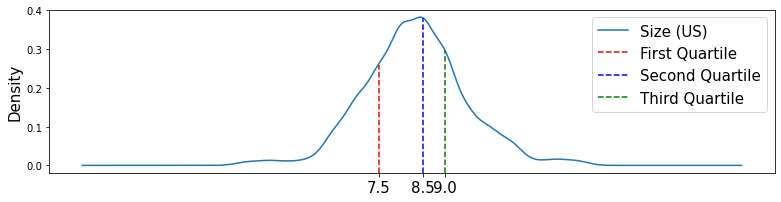

More than 50 percent of the sales are of shoe sizes between 7.5 and 9


In [29]:
plt.rcParams["figure.figsize"] = [13,3]
ger[ger['Gender'] == 'Female']['Size (US)'].plot(kind='density') # plot the density plot the density plot
plt.axvline(x = fq1, ymax=0.66, color='red', linestyle='--', label ="First Quartile")     # plot the first quartile
plt.axvline(x = fq2, ymax=0.95, color='blue', linestyle='--', label ="Second Quartile")   # plot the second quartile
plt.axvline(x = fq3, ymax=0.75, color='green', linestyle='--', label ="Third Quartile")   # plot the third quartile
plt.legend(loc="best", fontsize= 15)
plt.ylabel("Density", fontsize = 15)
plt.xticks(locs, labels, fontsize = 15 )# set locations and labels
plt.show()# to display the figure
print('More than 50 percent of the sales are of shoe sizes between 7.5 and 9')

## Central Limit Theorem 

In [30]:
series1 = data['Size (US)']
series2 = data['SalePrice']

In [31]:
# Central Limit Theorem

def central_limit_theorem(data,n_samples = 1000, sample_size = 500):
    """ Use this function to demonstrate Central Limit Theorem. 
        data = 1D array, or a pd.Series
        n_samples = number of samples to be created
        sample_size = size of the individual sample """
    %matplotlib inline
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    min_value = 0  # minimum index of the data
    max_value = data.count()  # maximum index of the data
    b = {}
    for i in range(n_samples):
        x = np.unique(np.random.randint(min_value, max_value, size = sample_size)) # set of random numbers with a specific size
        b[i] = data[x].mean()   # mean of each sample
    c = pd.DataFrame()
    c['sample'] = b.keys()  # sample number 
    c['Mean'] = b.values()  # mean of that particular sample
    plt.figure(figsize= (15,4))

    plt.subplot(1,2,2)
    sns.distplot(c.Mean)
    plt.title(f"Sampling Distribution. \n \u03bc = {round(c.Mean.mean(), 3)} & SE = {round(c.Mean.std(),3)}")
    plt.xlabel('data')
    plt.ylabel('freq')

    plt.subplot(1,2,1)
    sns.distplot(data)
    plt.title(f"Population Distribution. \n \u03bc = {round(data.mean(), 3)} & \u03C3 = {round(data.std(),3)}")
    plt.xlabel('data')
    plt.ylabel('freq')

    plt.show()

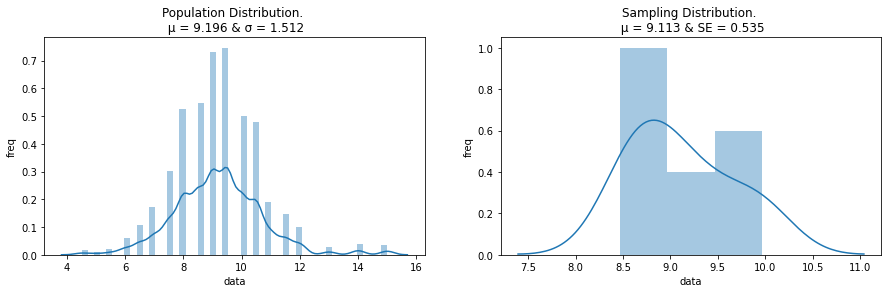

In [32]:
central_limit_theorem(series1,n_samples = 10, sample_size = 15) #Distributions for shoe size

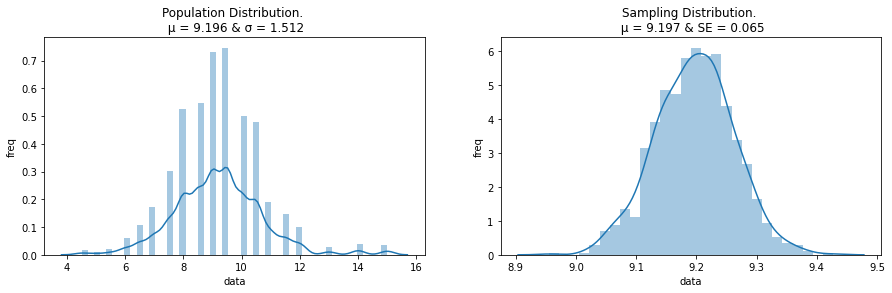

In [33]:
central_limit_theorem(series1,n_samples = 1000, sample_size = 500) #Distributions for shoe size

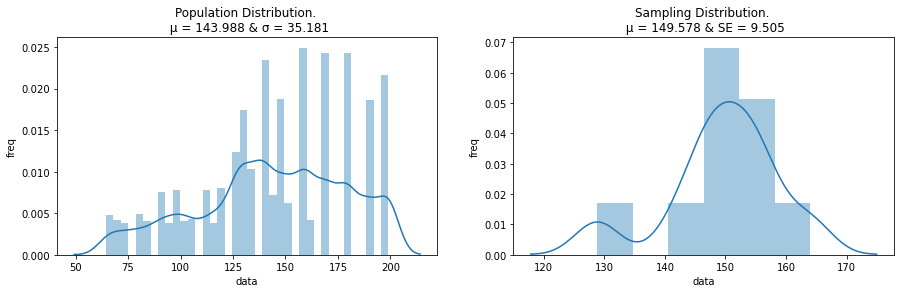

In [34]:
central_limit_theorem(series2,n_samples = 10, sample_size = 15) #Distributions for sale price

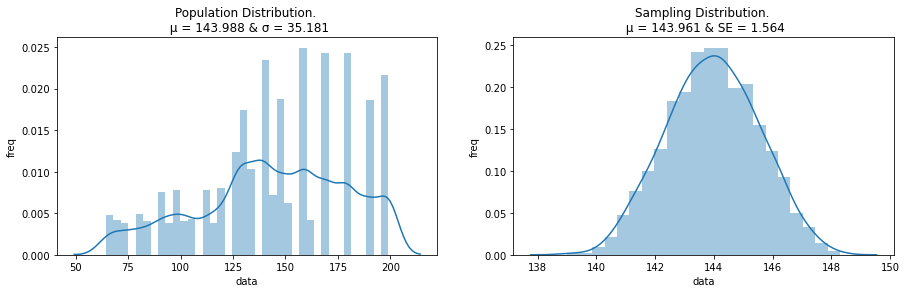

In [35]:
central_limit_theorem(series2,n_samples = 1000, sample_size = 500) #Distributions for sale price

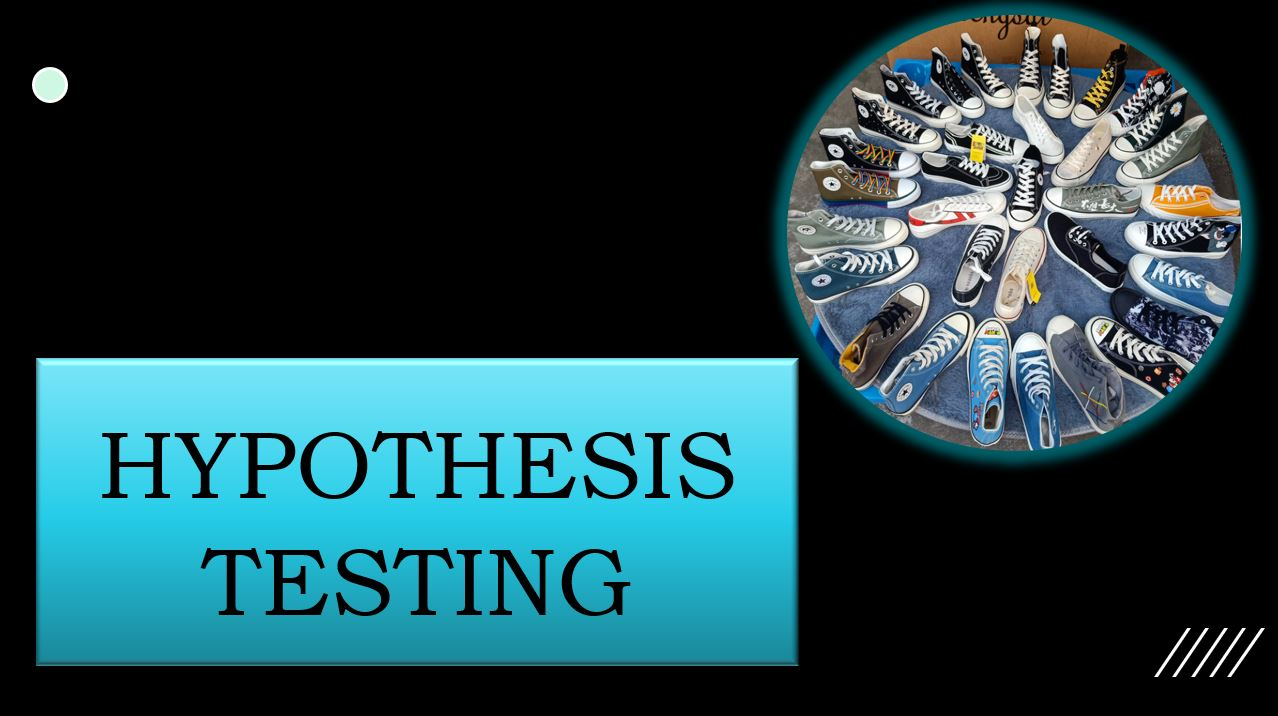

## Analysing country wise sale for Outlets

In [36]:
# Checking if average sales per store is the same in each country

# H0 : mu_sales_germany = mu_sales_canada = mu_sales_uk = mu_sales_us
# H1 : Average sales in atleast one combination of the above countries is not the same

piv = pd.crosstab(columns = data["Country"], index = data["Shop"],values = data['SalePrice'], aggfunc = np.sum, dropna = False)
piv.head(7)

Country,Canada,Germany,United Kingdom,United States
Shop,,,,
CAN1,52585.5,NaN,NaN,NaN
CAN2,63355.8,NaN,NaN,NaN
CAN3,62740.2,NaN,NaN,NaN
CAN5,60054.0,NaN,NaN,NaN
CAN6,124456.8,NaN,NaN,NaN
CAN7,62571.6,NaN,NaN,NaN
GER1,NaN,262665.9,NaN,NaN


In [37]:
canada = piv['Canada']
canada.dropna(inplace = True)
germany = piv['Germany']
germany.dropna(inplace = True)
uk = piv['United Kingdom']
uk.dropna(inplace = True)
us = piv['United States']
us.dropna(inplace = True)

In [38]:
print('Shapiro Test .')
print(stats.shapiro(canada))     
print(stats.shapiro(germany))
print(stats.shapiro(uk))
print(stats.shapiro(us))
print('Shapiro Test failed for Canada and US.\n')

alpha = 0.05
test_stat, p_val = stats.kruskal(canada,germany,uk,us)
print(p_val,alpha)
print('Since the p-value < alpha, we can conclude that average sales in some of the countries or all of the countries are not the same.')

print('\nGermany:',np.mean(germany),'\nCanada:',np.mean(canada),'\nUK:',np.mean(uk),'\nUSA:',np.mean(us))

Shapiro Test .
(0.6326850652694702, 0.0011160128051415086)
(0.8130996227264404, 0.14616988599300385)
(0.802111804485321, 0.08430074900388718)
(0.657211422920227, 8.981899009086192e-05)
Shapiro Test failed for Canada and US.

0.01359114803298458 0.05
Since the p-value < alpha, we can conclude that average sales in some of the countries or all of the countries are not the same.

Germany: 210193.3000000002 
Canada: 70960.65000000001 
UK: 50548.739999999976 
USA: 56398.64000000004


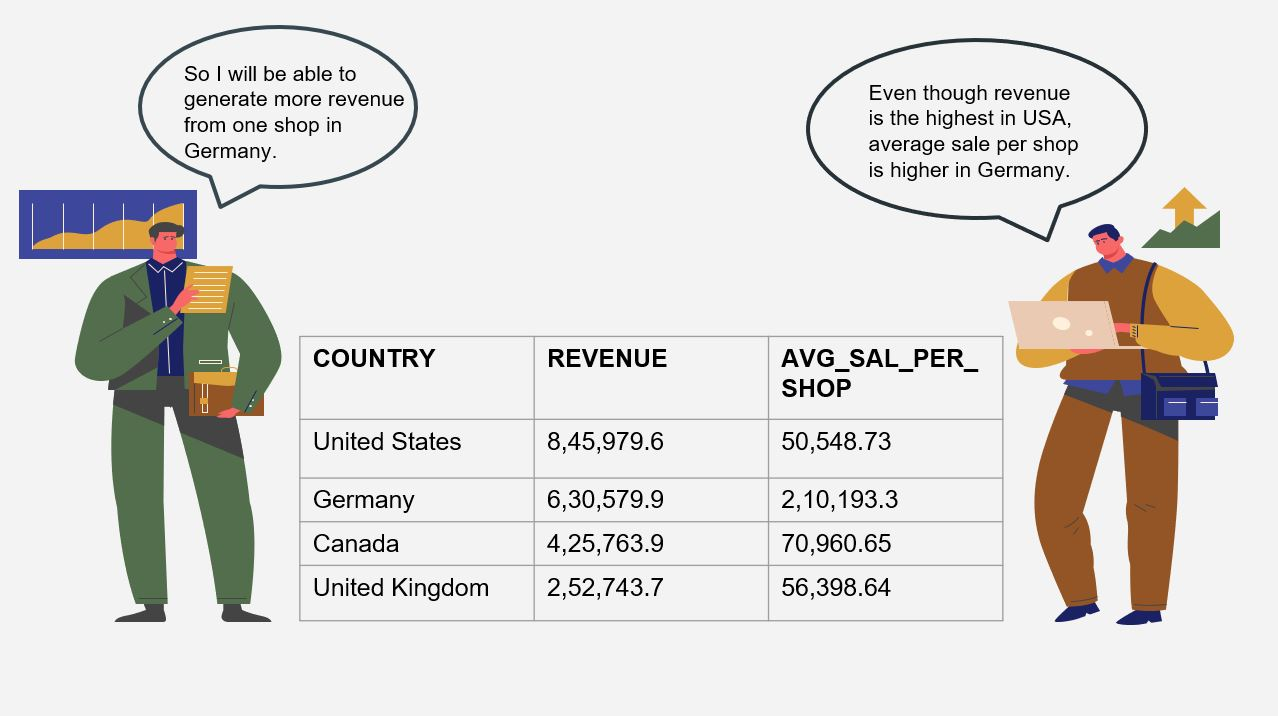

### MARKETING

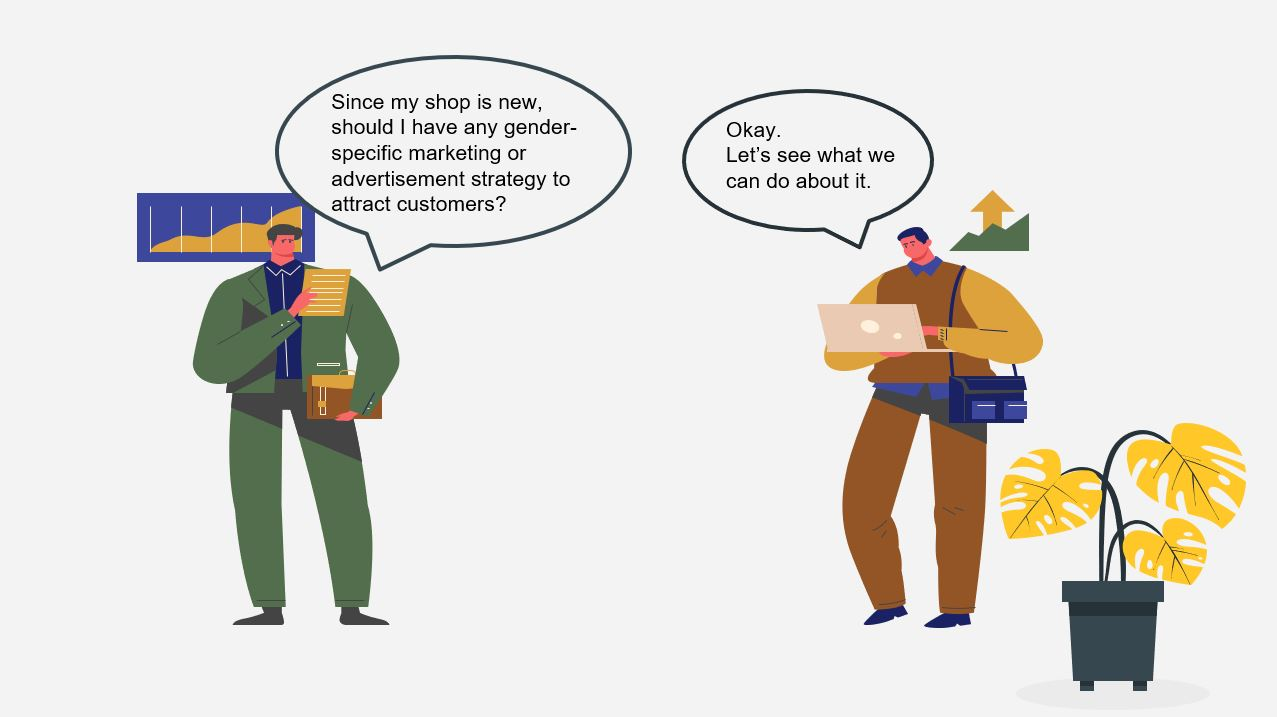

In [39]:
# Analysing if sale price of shoes for men and women is the same.

# H0 : mu_male  = mu_female
# H1 : mu_male != mu_female

In [40]:
ger=data[data['Country']=='Germany']
male=list(ger[ger['Gender']=='Male' ]['SalePrice'])
female=list(ger[ger['Gender']=='Female']['SalePrice'])
random.seed(50)
sample_male=random.sample(population=male,k=40)
sample_female=random.sample(population=female,k=40)

In [41]:
#Shapiro Test
print(stats.shapiro(sample_male))
print(stats.shapiro(sample_female))
print('Data is normal since pvalue > 0.05\n')
#Levene Test
print(stats.levene(sample_male,sample_female)) 
print('P-value > 0.05 which indicates variance is equal.\n')
#Ttest
print(stats.ttest_ind(sample_female,sample_male))

print('Since Pvalue > alpha, we fail to reject the Null Hypothesis.\nPrice of an average purchase for male and female is approximately the same.\n')
print('Result: There is no need for gender-specific advertisement because \nsale for a male or a female brings in almost the same amount of revenue.')

(0.9407557249069214, 0.03667081519961357)
(0.9645951986312866, 0.23969358205795288)
Data is normal since pvalue > 0.05

LeveneResult(statistic=0.5391496481608022, pvalue=0.4649869811525429)
P-value > 0.05 which indicates variance is equal.

Ttest_indResult(statistic=-0.6316784526969025, pvalue=0.5294440185770942)
Since Pvalue > alpha, we fail to reject the Null Hypothesis.
Price of an average purchase for male and female is approximately the same.

Result: There is no need for gender-specific advertisement because 
sale for a male or a female brings in almost the same amount of revenue.


## INVENTORY MANAGEMENT

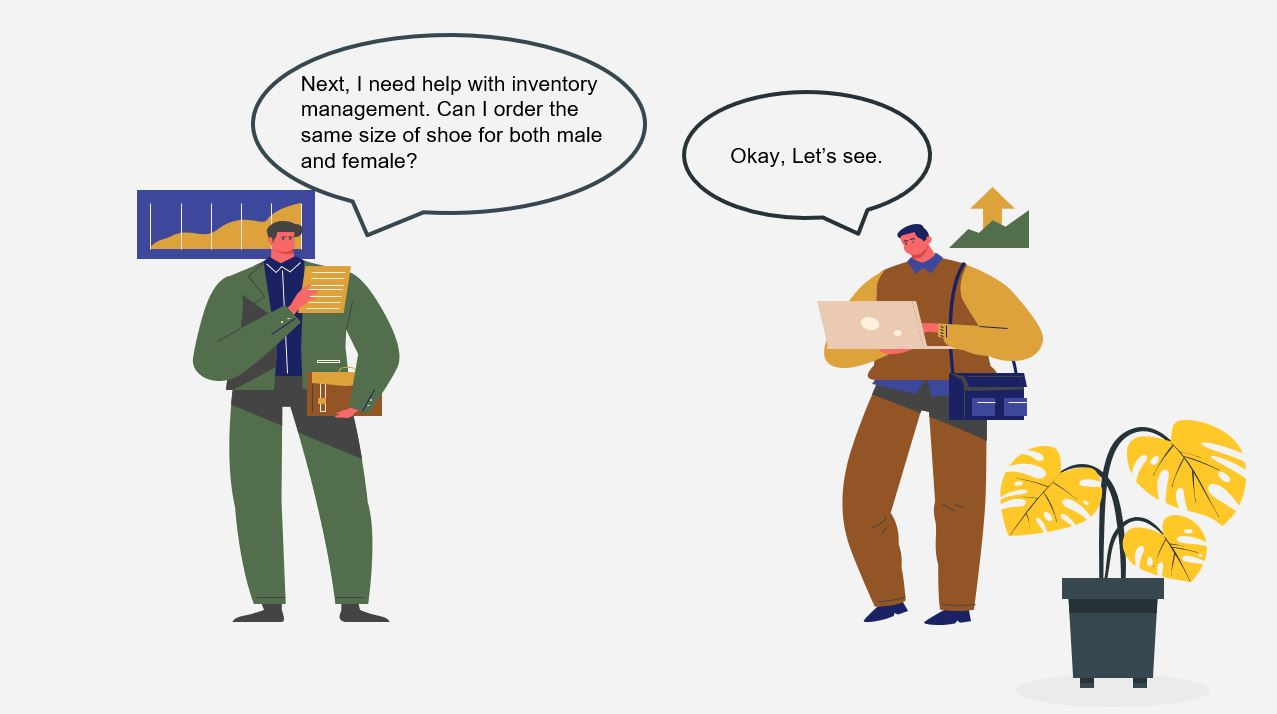

In [42]:
# Can I order shoes of same size for men and women

# H0 : mu_male_shoe_size  = mu_female_shoe_size
# H1 : mu_male_shoe_size  != mu_female_shoe_size

In [43]:
ger=data[data['Country']=='Germany']
male_shoe_size = list(ger[ger['Gender'] == 'Male']['Size (US)'])
female_shoe_size = list(ger[ger['Gender'] == 'Female']['Size (US)'])

In [44]:
random.seed(50)
sample_male = random.sample(population = male_shoe_size, k = 40)
sample_female = random.sample(population = female_shoe_size, k = 40)
print(stats.shapiro(sample_male))
print(stats.shapiro(sample_female))
print('Data is normal since pvalue > 0.05.\n')

print(stats.levene(sample_female,sample_male))
print('P-value > 0.05 which indicates variance is equal.\n')

print(stats.ttest_ind(sample_female,sample_male))
print('Since p-value < alpha we Reject the Null Hypothesis.')
print('\nResult: Average size of male shoe and female shoe is not the same.\nSo shoes of same size cannot be ordered for men and women')

(0.9650827646255493, 0.24885207414627075)
(0.9664088487625122, 0.27537769079208374)
Data is normal since pvalue > 0.05.

LeveneResult(statistic=3.1305743845879435, pvalue=0.08074534144562898)
P-value > 0.05 which indicates variance is equal.

Ttest_indResult(statistic=-5.499618669124496, pvalue=4.6557498486964913e-07)
Since p-value < alpha we Reject the Null Hypothesis.

Result: Average size of male shoe and female shoe is not the same.
So shoes of same size cannot be ordered for men and women


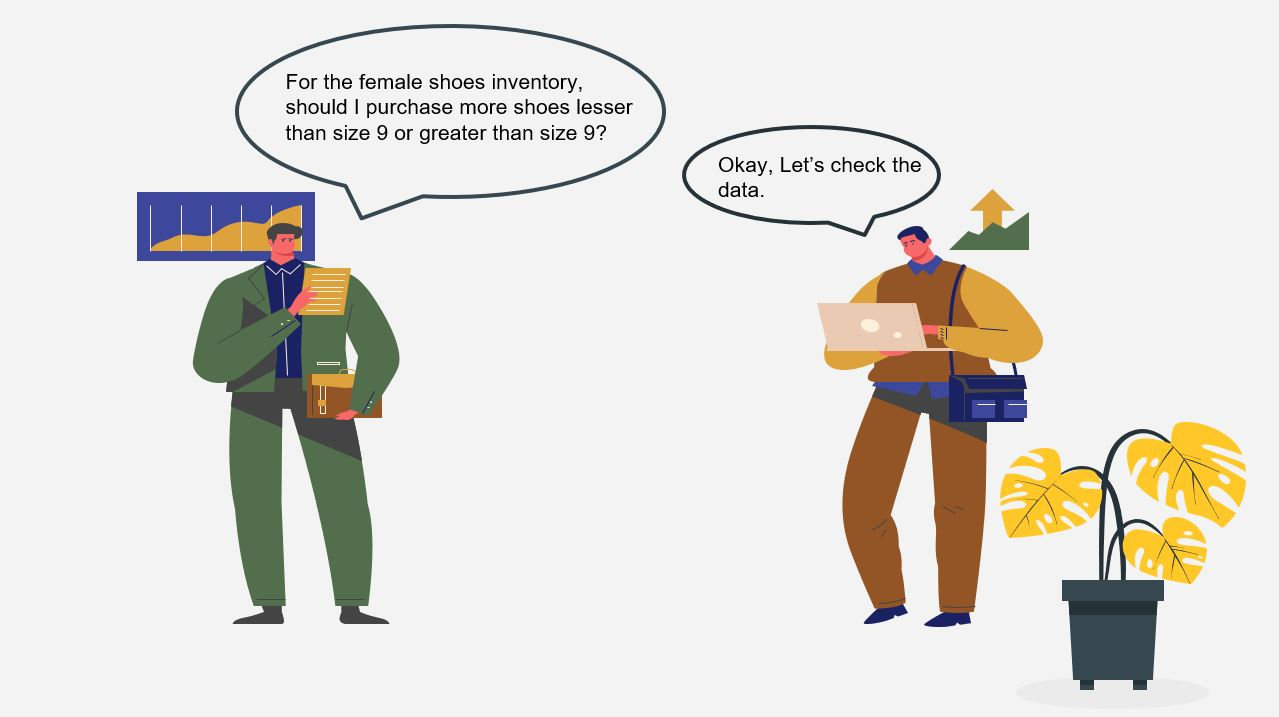

In [45]:
## Checking if Average shoe size of female is less than the mean

# H0 : female_mu_size >= 9
# H1 : female_mu_size <  9  

ger=data[data['Country']=='Germany']
alpha = 0.05
female_shoe_size = list(ger[ger['Gender'] == 'Female']['Size (US)'])
random.seed(4)
sample_female = random.sample(population = female_shoe_size, k = 30)

print(stats.shapiro(sample_female))
print('Data is normal since pvalue > 0.05\n')


zstat,pvalue=stats.ttest_1samp(sample_female,9)
print(pvalue,alpha)
print('Pvalue < 0.05\n')
print('Since p-value < alpha we reject the Null Hypothesis. So average size of female shoe is less than 9.')
print('Result : We should keep shoes below size 9 in higher quantity.')

(0.9402973651885986, 0.09265157580375671)
Data is normal since pvalue > 0.05

7.339858105441615e-05 0.05
Pvalue < 0.05

Since p-value < alpha we reject the Null Hypothesis. So average size of female shoe is less than 9.
Result : We should keep shoes below size 9 in higher quantity.


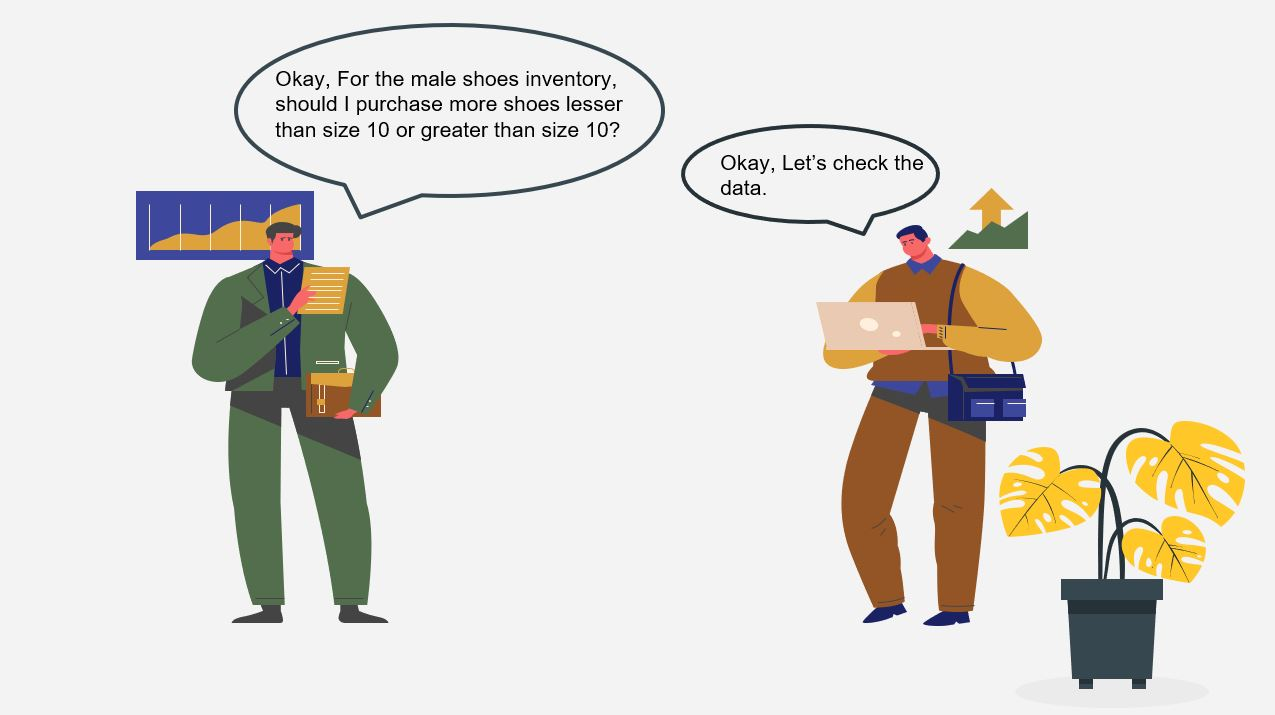

In [46]:
# H0 : male_mu_size >= 10
# H1 : male_mu_size <  10

ger=data[data['Country']=='Germany']
alpha = 0.05
male_shoe_size = list(ger[ger['Gender'] == 'Male']['Size (US)'])

random.seed(5)
sample_male = random.sample(population = male_shoe_size,k = 30)

print(stats.shapiro(sample_male))

zstat,pvalue = stats.ttest_1samp(sample_male,10)
print(pvalue, alpha)
print('Since p-value > alpha we fail to reject the Null Hypothesis. So average size of male shoe is above 10.')
print('Result : We should keep shoes above size 10 in higher quantity.')


(0.9204987287521362, 0.027632489800453186)
0.5142272204810298 0.05
Since p-value > alpha we fail to reject the Null Hypothesis. So average size of male shoe is above 10.
Result : We should keep shoes above size 10 in higher quantity.


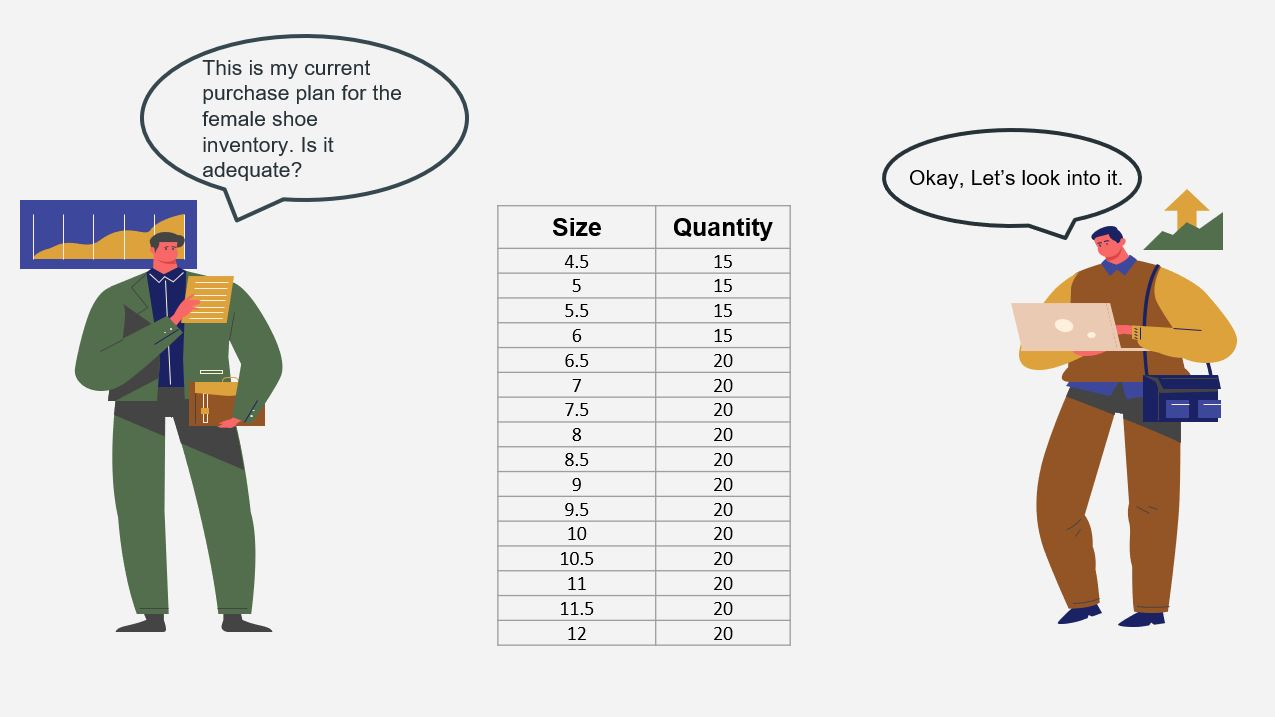

In [47]:
female = data[data.Gender == 'Female']
Female_Y2016 = female[female.Year == 2016]
Female_Y2016_Country = Female_Y2016[Female_Y2016.Country == 'Germany']
piv = pd.crosstab(Female_Y2016_Country["Size (US)"], Female_Y2016_Country["Month"], dropna = False)
std = np.std(piv,axis=1)
sum = 0
count = 0
for x in range(1,13):
        sum += piv[x]
        count += 1
n = count
piv['Total'] = sum                            # To find total number of shoes sold
piv['Mean'] = sum/n                           # To find average number of shoes sold per month
piv['std'] = std
length = n
piv['length'] = length
se=piv['std']/np.sqrt(piv['length'])
piv['Standard Error'] = se                    # To account for any error in shoes sold each month

In [48]:
# But keeping exact number of stock we may not be able to sell to every customer in case of a 
# sudden spike in demand seasonally or otherwise to avoid that we calculate confidence interval 
# Say we want to be 95% confident to supply to every customer

alpha = 0.05
zcrit = stats.norm.isf(alpha)

# Finding confidence interval inorder to never be under stocked
piv['Stock_to_maintain'] = round(piv['Mean'] + (zcrit*piv['Standard Error']))  
total_shoes_sold = np.sum(piv['Stock_to_maintain'])
#print(total_shoes_sold)
piv["Percentile"] = round((piv['Stock_to_maintain']/total_shoes_sold)*100)     

In [49]:
piv

Month,1,2,3,4,5,6,7,8,9,10,11,12,Total,Mean,std,length,Standard Error,Stock_to_maintain,Percentile
Size (US),,,,,,,,,,,,,,,,,,,
4.5,0,0,0,0,1,3,0,0,0,1,1,0,6,0.500000,0.866025,12,0.250000,1.0,1.0
5.0,0,0,0,0,0,0,2,3,0,0,0,0,5,0.416667,0.953794,12,0.275336,1.0,1.0
5.5,0,0,0,0,0,0,0,1,0,2,1,1,5,0.416667,0.640095,12,0.184780,1.0,1.0
6.0,0,5,3,1,2,0,0,0,0,0,0,0,11,0.916667,1.552328,12,0.448118,2.0,2.0
6.5,5,3,3,3,2,2,2,1,6,2,8,4,41,3.416667,1.934698,12,0.558499,4.0,4.0
7.0,0,4,3,8,3,3,2,2,4,3,1,7,40,3.333333,2.173067,12,0.627311,4.0,4.0
7.5,4,3,5,4,6,17,15,12,23,24,8,5,126,10.500000,7.251437,12,2.093309,14.0,16.0
8.0,22,17,8,22,9,6,17,14,10,21,11,12,169,14.083333,5.392253,12,1.556609,17.0,19.0
8.5,20,18,22,12,20,11,25,18,11,16,17,17,207,17.250000,4.145781,12,1.196784,19.0,21.0


In [50]:
pur_plan = pd.read_csv('../input/al-bundy-stats/purchase_plan_female.csv')
print(pur_plan)

    Size  Female
0    4.5      15
1    5.0      15
2    5.5      15
3    6.0      15
4    6.5      20
5    7.0      20
6    7.5      20
7    8.0      20
8    8.5      20
9    9.0      20
10   9.5      20
11  10.0      20
12  10.5      20
13  11.0      20
14  11.5      20
15  12.0      20


In [51]:
n = 350
expected = list((piv['Percentile']/100)*350)
print(expected)

observed_plan = list(pur_plan['Female'])
print(observed_plan)

print(stats.chisquare(f_obs = observed_plan, f_exp = expected))
print('Pvalue < alpha so we reject Null Hypothesis.')
print('Result: Current purchase plan is not a good fit.')
print('\n')

[3.5, 3.5, 3.5, 7.0, 14.0, 14.0, 56.0, 66.5, 73.5, 38.5, 28.0, 10.5, 7.0, 3.5, 3.5, 7.0]
[15, 15, 15, 15, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
Power_divergenceResult(statistic=445.87063437815317, pvalue=1.5284204780546322e-85)
Pvalue < alpha so we reject Null Hypothesis.
Result: Current purchase plan is not a good fit.




In [52]:
male = data[data.Gender == 'Male']
Male_Y2016 = male[male.Year == 2016]
Male_Y2016_Country = Male_Y2016[Male_Y2016.Country == 'Germany']

piv1 = pd.crosstab(Male_Y2016_Country["Size (US)"], Male_Y2016_Country["Month"], dropna = False)
piv1.columns
std = np.std(piv1,axis = 1)

sum = 0
count = 0
for x in range(1,13):
        sum += piv1[x]
        count += 1
n = count
piv1['Total'] = sum                          # To find total number of shoes sold
piv1['Mean'] = sum/n                         # To find average number of shoes sold per month
piv1['std'] = std
length = n
piv1['length'] = length
se = piv1['std']/np.sqrt(piv1['length'])
piv1['Standard Error'] = se                  # To account for any error in shoes sold each month
piv1

Month,1,2,3,4,5,6,7,8,9,10,11,12,Total,Mean,std,length,Standard Error
Size (US),,,,,,,,,,,,,,,,,
6.0,2,1,0,0,0,1,0,2,0,6,1,1,14,1.166667,1.624466,12,0.468943
6.5,1,1,0,0,0,2,2,0,1,0,0,0,7,0.583333,0.759203,12,0.219163
7.0,0,0,2,0,0,3,1,2,3,1,1,0,13,1.083333,1.114924,12,0.321851
7.5,4,2,0,1,4,5,2,2,4,2,1,3,30,2.500000,1.443376,12,0.416667
8.0,6,2,4,8,1,5,3,6,6,7,5,6,59,4.916667,1.977302,12,0.570798
8.5,7,7,7,10,7,8,13,4,9,9,7,2,90,7.500000,2.661453,12,0.768295
9.0,16,3,9,13,16,23,28,11,35,13,9,15,191,15.916667,8.489781,12,2.450789
9.5,22,17,11,12,20,29,26,14,22,33,21,29,256,21.333333,6.737128,12,1.944841
10.0,13,16,13,26,15,21,27,15,16,18,17,12,209,17.416667,4.680782,12,1.351225


In [53]:
# But keeping exact number of stock we may not be able to sell to every customer in case of a 
# sudden spike in demand seasonally or otherwise to avoid that we calculate confidence interval 
# Say we want to be 95% confident to supply to every customer
alpha = 0.05
zcrit = stats.norm.isf(alpha)

# Finding confidence interval inorder to never be under stocked

piv1['Stock_to_maintain'] = round(piv1['Mean'] + (zcrit*piv1['Standard Error']))
total_shoes_sold = np.sum(piv1['Stock_to_maintain'])
#print(total_shoes_sold)
piv1["Percentile"] = round((piv1['Stock_to_maintain']/total_shoes_sold)*100)

In [54]:
piv1

Month,1,2,3,4,5,6,7,8,9,10,11,12,Total,Mean,std,length,Standard Error,Stock_to_maintain,Percentile
Size (US),,,,,,,,,,,,,,,,,,,
6.0,2,1,0,0,0,1,0,2,0,6,1,1,14,1.166667,1.624466,12,0.468943,2.0,1.0
6.5,1,1,0,0,0,2,2,0,1,0,0,0,7,0.583333,0.759203,12,0.219163,1.0,1.0
7.0,0,0,2,0,0,3,1,2,3,1,1,0,13,1.083333,1.114924,12,0.321851,2.0,1.0
7.5,4,2,0,1,4,5,2,2,4,2,1,3,30,2.500000,1.443376,12,0.416667,3.0,2.0
8.0,6,2,4,8,1,5,3,6,6,7,5,6,59,4.916667,1.977302,12,0.570798,6.0,4.0
8.5,7,7,7,10,7,8,13,4,9,9,7,2,90,7.500000,2.661453,12,0.768295,9.0,7.0
9.0,16,3,9,13,16,23,28,11,35,13,9,15,191,15.916667,8.489781,12,2.450789,20.0,15.0
9.5,22,17,11,12,20,29,26,14,22,33,21,29,256,21.333333,6.737128,12,1.944841,25.0,18.0
10.0,13,16,13,26,15,21,27,15,16,18,17,12,209,17.416667,4.680782,12,1.351225,20.0,15.0


In [55]:
pur_plan = pd.read_csv('../input/al-bundy-stats/Purchase_plan_male.csv')
n = 350
expected = list((piv1['Percentile']/100)*350)
print(expected)
observed_plan = list(pur_plan['Male'])
print(observed_plan)
print(len(expected),len(observed_plan))
print(stats.chisquare(f_obs = observed_plan, f_exp = expected))
print('Pvalue > alpha so we reject Null Hypothesis.')
print('Result: Current purchase plan is a good fit.')

[3.5, 3.5, 3.5, 7.0, 14.0, 24.500000000000004, 52.5, 63.0, 52.5, 52.5, 21.0, 21.0, 14.0, 3.5, 3.5, 7.0]
[5, 5, 5, 15, 15, 25, 45, 70, 50, 45, 20, 20, 15, 5, 5, 5]
16 16
Power_divergenceResult(statistic=16.21655328798186, pvalue=0.3678072395446861)
Pvalue > alpha so we reject Null Hypothesis.
Result: Current purchase plan is a good fit.


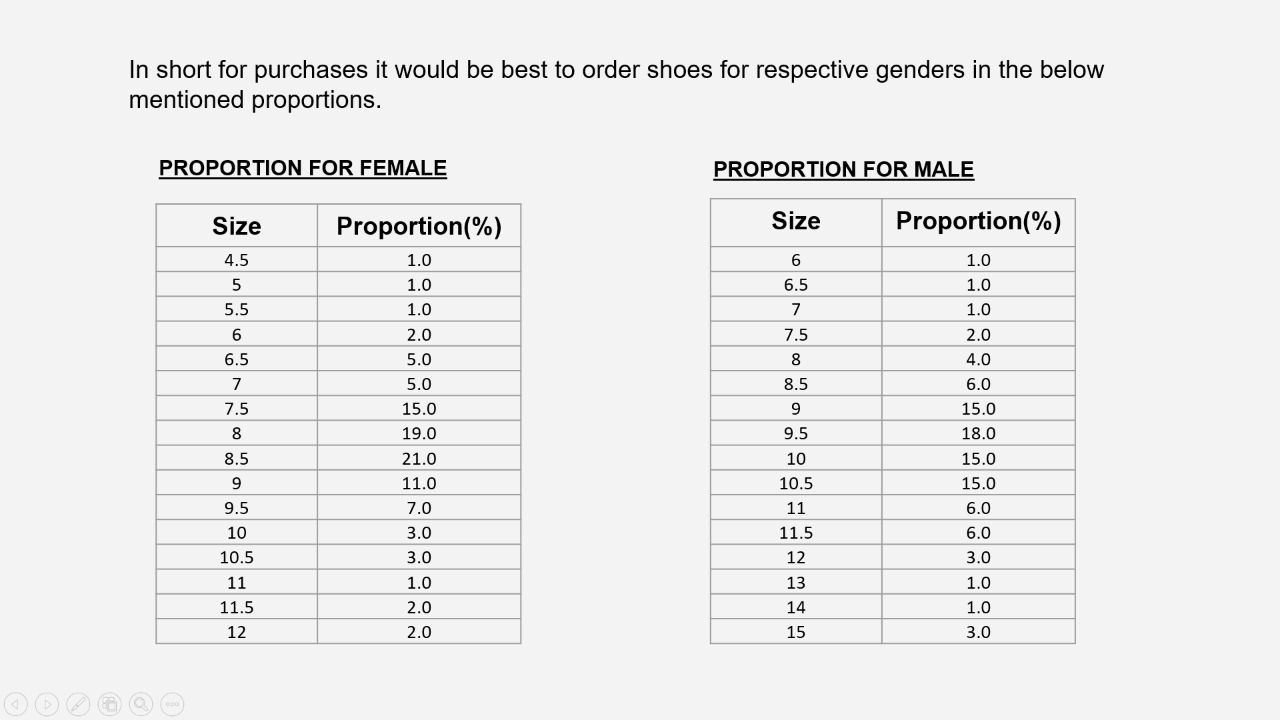

CONCLUSIONS:

1. Overall, the United States has the highest revenue generated in terms of the product(i.e. shoes) sales. However, in terms of the revenue generated per shop, Germany has significantly larger revenue. Hence, Germany is the right choice for opening a new franchise.

2. The revenue generated in terms of product (i.e shoes) sales is the same, irrespective of the gender. Therefore, there is no need for gender-specific marketing of shoes.


3. We saw that the shoe sizes for male and female are different. Hence, in order to have a balanced inventory we have to order different shoe sizes for males and females.

4. For better inventory management in case of female shoes, we need to stock up more on female shoe sizes less than 9.

5. For better inventory management in case of male shoes, we need to stock up more on male shoe sizes more than 10.